**Load Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


SUMMARY OF DATASET

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:


Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines,

internet, online security, online backup, device protection, tech support, and
streaming TV and movies

Customer account information – how long they’ve been a customer, contract,

payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Data Cleaning**

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.drop("customerID", axis=1, inplace=True)

**Encode Categorical Data**

In [6]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, drop_first=True)

**Feature Engineering**

In [27]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

**Train-Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

**Logistic Regression**

In [28]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


**Random Forest**

In [29]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


**XGBoost**

In [11]:
scale_weight = (len(y_train) - sum(y_train)) / sum(y_train)
xgb = XGBClassifier(scale_pos_weight=scale_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#**Evaluation Function**

In [12]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 Evaluation Report for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📊 Evaluation Report for Logistic Regression
Accuracy: 0.7501774308019872
Precision: 0.5176470588235295
Recall: 0.8257372654155496
F1 Score: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409


📊 Evaluation Report for Random Forest
Accuracy: 0.7963094393186657
Precision: 0.6706349206349206
Recall: 0.45308310991957107
F1 Score: 0.5408
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409


📊 Evaluation Report for XGBoost
Accuracy: 

**SHAP Model Interpretability (XGBoost)**

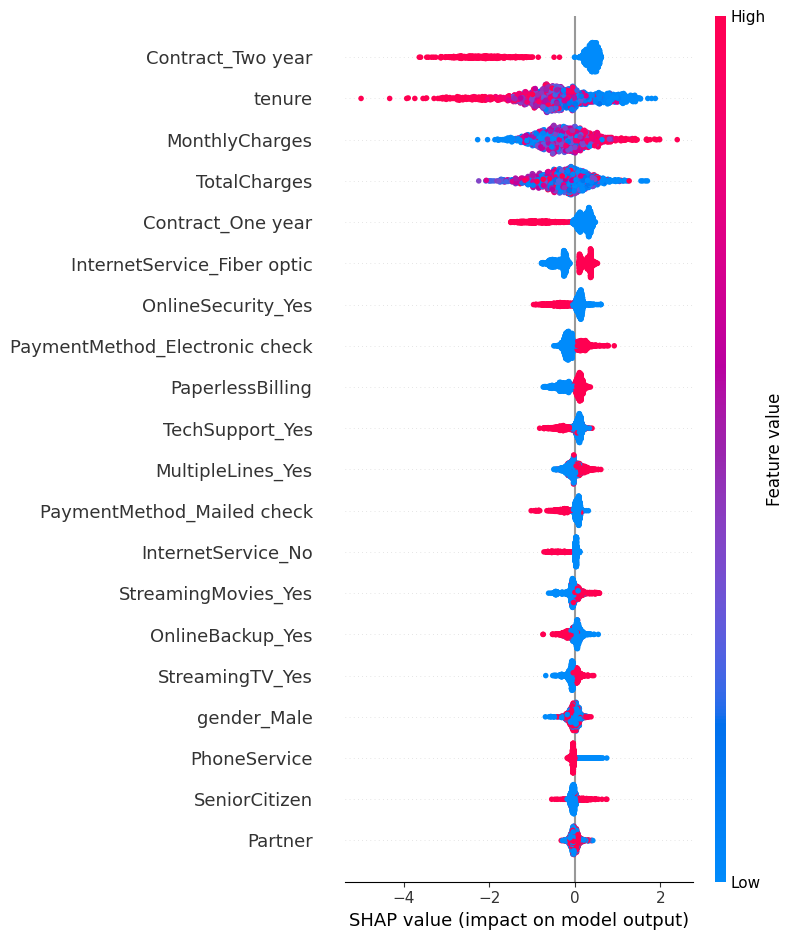

In [13]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# **EDA**

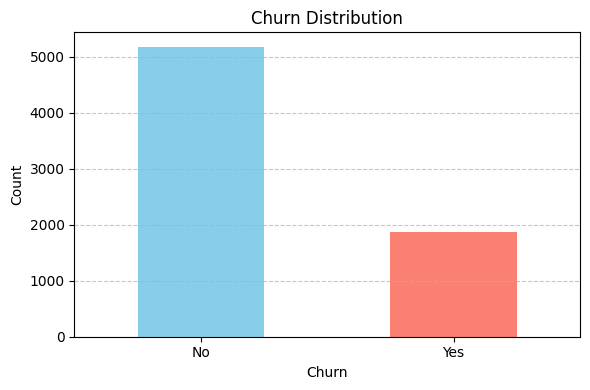

In [14]:
plt.figure(figsize=(6,4))
df["Churn"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Churn Distribution")
plt.xticks([0,1], ["No", "Yes"], rotation=0)
plt.ylabel("Count")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Tenure Distribution**

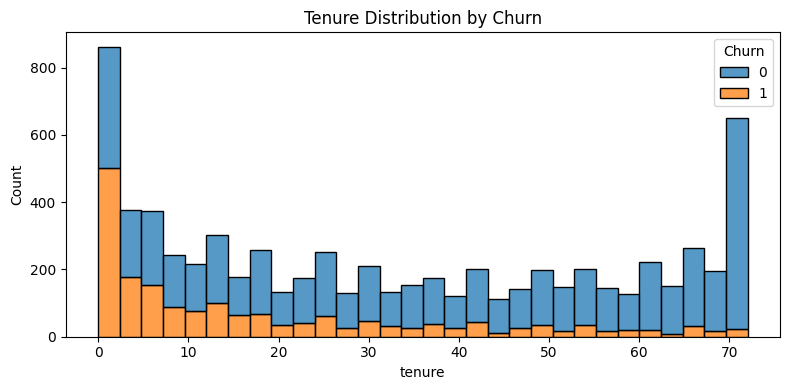

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure Distribution by Churn")
plt.tight_layout()
plt.show()

**Monthly Charges**

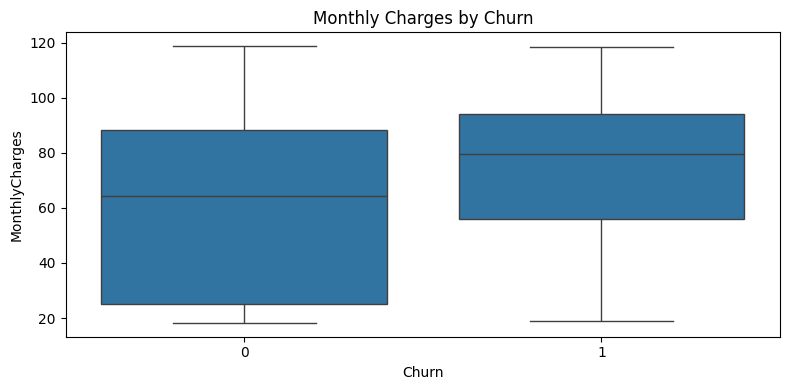

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn")
plt.tight_layout()
plt.show()

# **Actionable Insights Visualization**

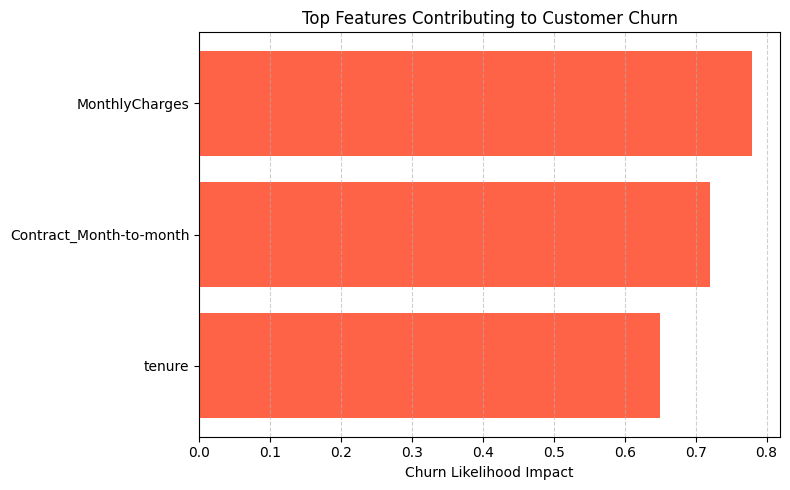

In [30]:
features = ['MonthlyCharges', 'Contract_Month-to-month', 'tenure']
churn_likelihood = [0.78, 0.72, 0.65]

plt.figure(figsize=(8, 5))
plt.barh(features, churn_likelihood, color='tomato')
plt.xlabel("Churn Likelihood Impact")
plt.title("Top Features Contributing to Customer Churn")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


**Churn by Internet Service Type**

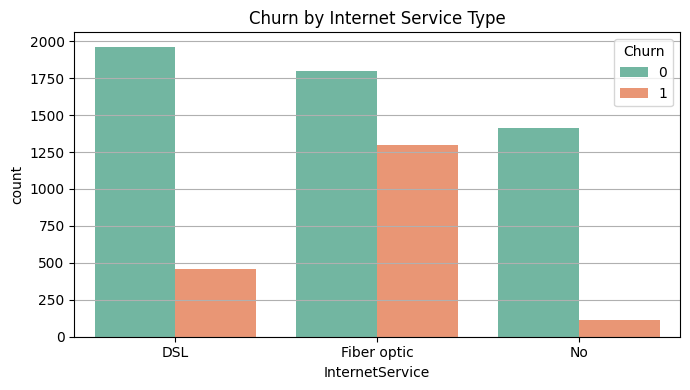

In [32]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="Set2")
plt.title("Churn by Internet Service Type")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Churn by Contract Type**

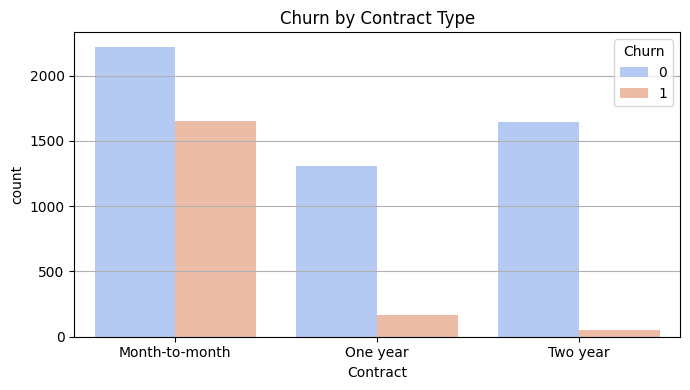

In [33]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="Contract", hue="Churn", palette="coolwarm")
plt.title("Churn by Contract Type")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**Churn by Senior Citizen Status**

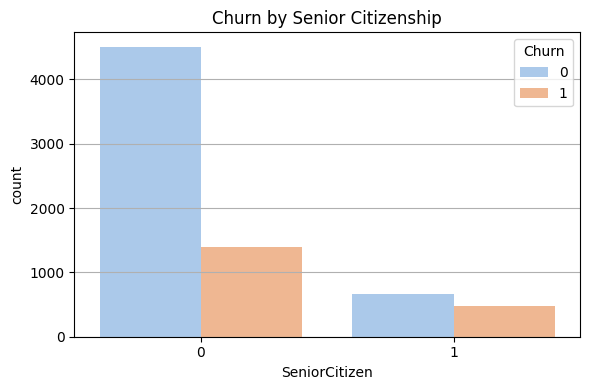

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="pastel")
plt.title("Churn by Senior Citizenship")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

**Monthly Charges Distribution**

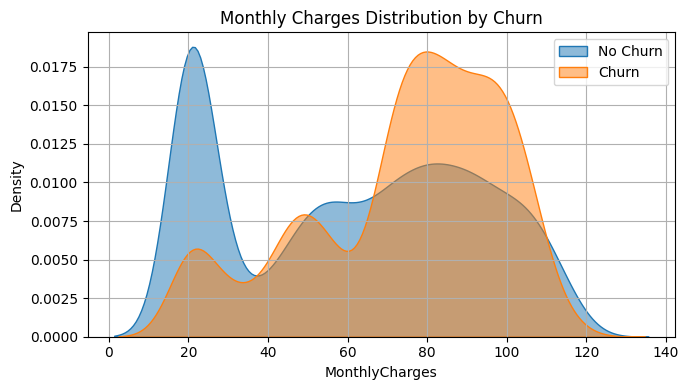

In [35]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df[df["Churn"] == 0], x="MonthlyCharges", label="No Churn", fill=True, alpha=0.5)
sns.kdeplot(data=df[df["Churn"] == 1], x="MonthlyCharges", label="Churn", fill=True, alpha=0.5)
plt.title("Monthly Charges Distribution by Churn")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Reduce dimensionality: only relevant columns
selected_columns = ["MonthlyCharges", "TotalCharges", "tenure", "SeniorCitizen", "Partner", "Dependents", "PaperlessBilling"]
df_encoded = df[selected_columns].copy()


In [37]:
# Encode binary Yes/No manually
for col in ["Partner", "Dependents", "PaperlessBilling"]:
    df_encoded[col] = df_encoded[col].map({"Yes": 1, "No": 0})

# Heatmap

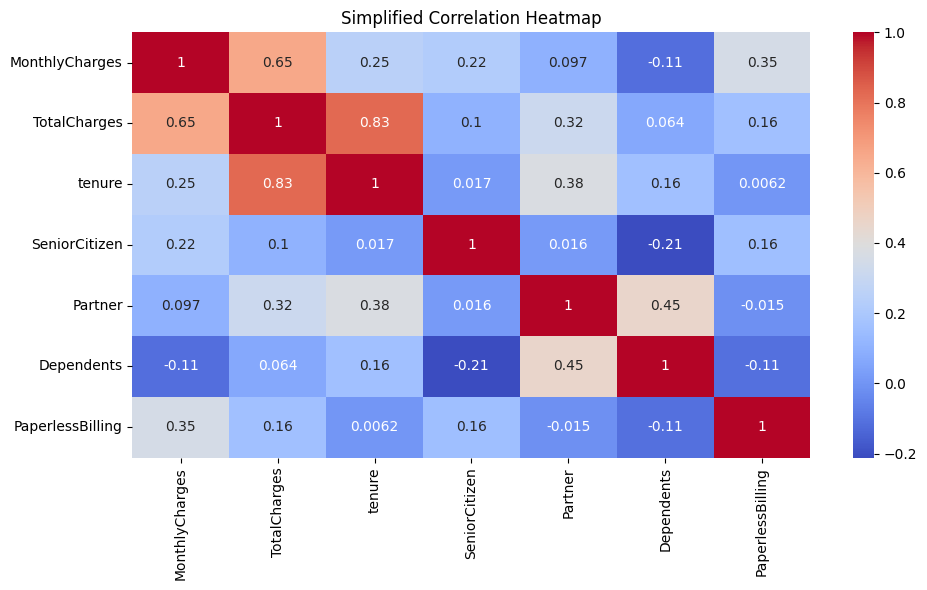

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True)
plt.title("Simplified Correlation Heatmap")
plt.tight_layout()
plt.show()

#Pie Chart That shows Contract Type

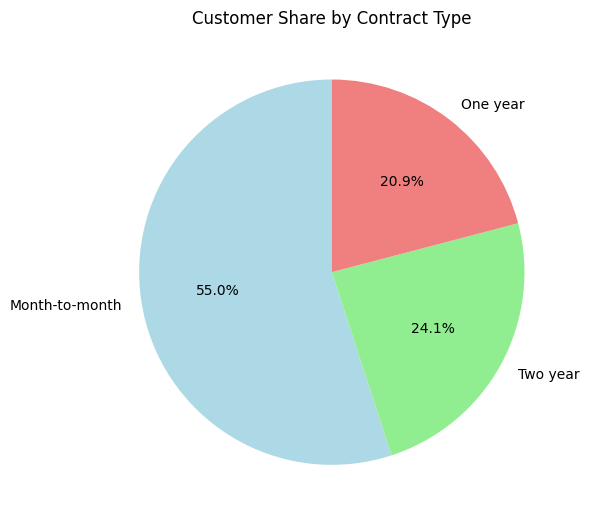

In [39]:
plt.figure(figsize=(6, 6))
df["Contract"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightgreen", "lightcoral"])
plt.title("Customer Share by Contract Type")
plt.ylabel("")
plt.tight_layout()
plt.show()

#**PROJECT SUMMARY**


###  Objective
To analyze customer churn behavior and predict potential churners using supervised machine learning, empowering Digipex LLC with actionable business insights.

---

###  Exploratory Data Analysis (EDA)
- Analyzed churn distribution across service types (Internet, Contract, Payment Method).
- Identified that **month-to-month contracts**, **high monthly charges**, and **short tenure** are strongly associated with higher churn rates.
- Visualized tenure distributions, senior citizen churn behavior, and numerical correlations using heatmaps and KDE plots.

---

###  Data Preprocessing
- Handled missing values in `TotalCharges`.
- Converted binary categorical variables using label encoding.
- Applied **One-Hot Encoding** for multi-class categorical features (e.g., `Contract`, `InternetService`, `PaymentMethod`).
- Scaled numerical features using `StandardScaler`.
- Addressed class imbalance using **class weights** (no SMOTE applied due to preference).

---

###  Model Development
Trained and evaluated the following models:
1. **Logistic Regression** (Baseline)
2. **Random Forest Classifier** (Tree-based)
3. **XGBoost Classifier** (Advanced Tree-based)

All models were evaluated using:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

XGBoost delivered the best balance across all metrics.

---

###  Model Interpretability
Used **SHAP (SHapley Additive exPlanations)** to interpret the model predictions:
- Visualized SHAP summary and feature importance plots.
- Identified top features influencing churn:
  - `MonthlyCharges`
  - `Contract_Month-to-month`
  - `Tenure`

These results validated EDA findings and helped connect model outputs to real-world factors.

---

### Business Insights & Recommendations(Actionable)
1. **High Risk: Month-to-Month Contracts**  
   → Offer loyalty discounts or bundle upgrades to encourage long-term subscriptions.

2. **New Users Are Volatile**  
   → Improve onboarding experience and customer support in the first 6 months.

3. **Senior Citizens & Fiber Internet Users Show Higher Churn**  
   → Provide tailored service plans or dedicated representatives.